# Chapter 2: Hierarchical Clustering

## Exercises 2.01 and 2.02

In [1]:
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
%matplotlib inline

# Set sig digits for output
np.set_printoptions(precision=3)

### Exercise 2.01: Building a Hierarchy

In this exercise we introduce helper functions provided by the SciPy package that help calculate distances and dendrograms for us.

In [27]:
# Import helper functions from SciPy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [28]:
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

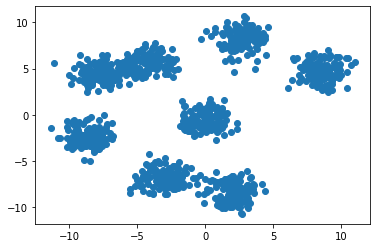

In [29]:
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [30]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")

print(distances)

[[5.720e+02 7.620e+02 7.694e-03 2.000e+00]
 [3.000e+01 1.960e+02 8.879e-03 2.000e+00]
 [5.910e+02 8.700e+02 1.075e-02 2.000e+00]
 ...
 [1.989e+03 1.992e+03 7.812e+00 3.750e+02]
 [1.995e+03 1.996e+03 1.024e+01 7.500e+02]
 [1.994e+03 1.997e+03 1.200e+01 1.000e+03]]


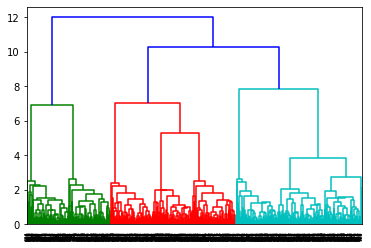

In [31]:
# Plot a dendrogram with 'dendrogram' function - notice how long it takes with large datasets!
dn = dendrogram(distances)
plt.show()

In [14]:
# Scipy also provides an 'fcluster' function that uses the distance matrix to generate cluster labels
scipy_clusters = fcluster(distances, 3, criterion="distance")

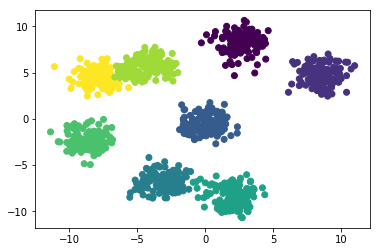

In [15]:
# Show the final cluster memberships as generated from SciPy packages
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

### Exercise 2.02: Applying Linkage Criteria

<b>Scenario:</b> You are given a data set without prior background information and are requested to find the hierarchical clustering linkage that fits it the best. 

<b>Aim: </b>Given what you’ve learned about Agglomerative Clustering with Centroid Linkage in SciPy, evaluate the remaining Linkage types and consider when you would use each in practice.

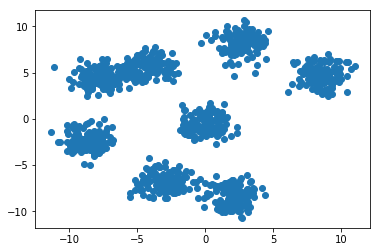

In [16]:
# Use the same dataset as seen in Exercise 1
# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

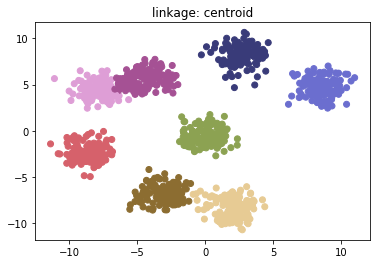

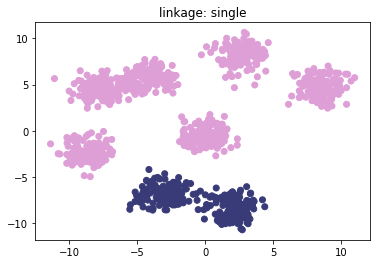

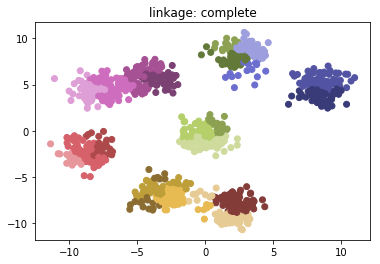

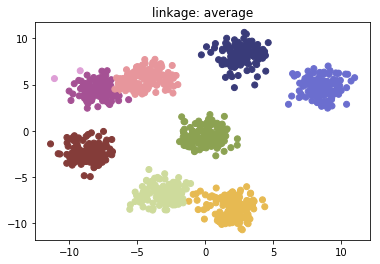

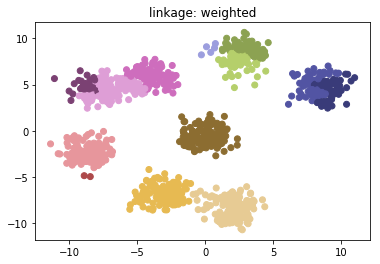

In [17]:
methods = ['centroid', 'single', 'complete', 'average', 'weighted']

for method in methods:
    distances = linkage(X, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance") 
    plt.title('linkage: ' + method)
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab20b')
    plt.show()

View the documentation for 'linkage' and 'fcluster' to understand what each of the parameters is doing and how they impact the final clusters. Which methods best fit our specific problem? Why does changing one thing affect the other?

### Exercise 2.03: Implementing Agglomerative Clustering with scikit-learn

Now that you know how Hierarchical Clustering works, rest assured that you don't have to recreate it every time you want to use it. The popular Sci-Kit Learn package has this unsupervised learning algorithm built in for easy deployment!

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
ac = AgglomerativeClustering(n_clusters = 8, affinity="euclidean", linkage="average")

In [20]:
sklearn_clusters = ac.fit_predict(X)

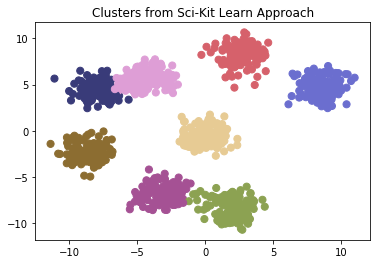

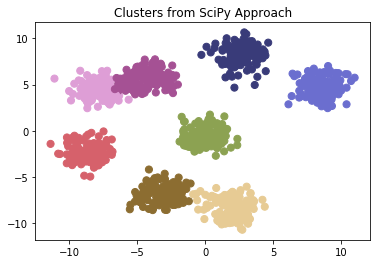

In [21]:
plt.figure(figsize=(6,4))
plt.title("Clusters from Sci-Kit Learn Approach")
plt.scatter(X[:, 0], X[:, 1], c = sklearn_clusters ,s=50, cmap='tab20b')
plt.show()

plt.figure(figsize=(6,4))
plt.title("Clusters from SciPy Approach")
plt.scatter(X[:, 0], X[:, 1], c = scipy_clusters ,s=50, cmap='tab20b')
plt.show()